# Convolutional Neural Networks

**Convolutional Neural Networks (CNN) represent spatial relationships**

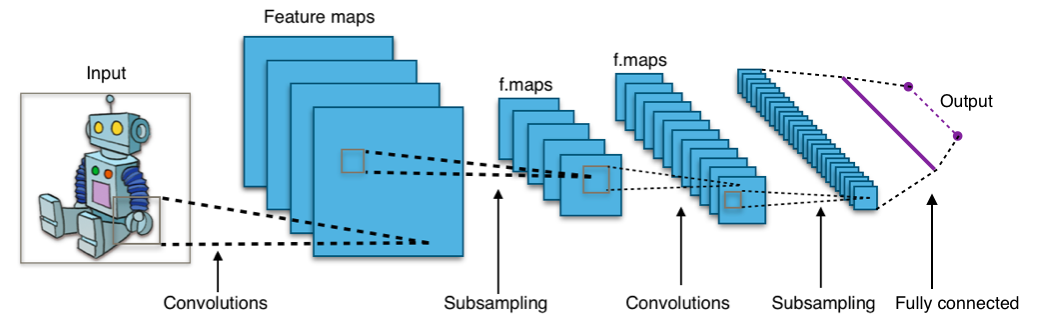

We take an image, we run Convolutional Kernels over it, and we result with a Feature Map!

Convolutional Kernels/Filters are trained with Backpropagation.

## Convolutional Layers

Convolutional Layers are applied to a **sliding window** that processes only a portion of the input at a time. They therefore represent **spatial relationships** between pixels.

A Convolutional Layer contains not just one set of neurons for processing a portion of the input. They contain many sets that are called **feature maps** or **filters**. During training, each feature map specializes in a particular feature of the input.

In an early Convolutional Layer these features might be dots, straight lines and angles. The following Convolutional Layers combine the features of the previous Layers so that they recognize more complex geometrical shapes, and, ultimately, whole objects.

## Hyperparameters

Some hyperparameters of a convolutional layer are:

- The size of the sliding window (also called **convolutional kernel**)
- The **stride** or step width in which the sliding window moves
- The number of **feature maps** (filters)
- What kind of **padding** is applied on the borders of the input (e.g. filling it with zeroes to reach the corners).

Convolutional Layers with two dimensions are the most common, but 1D layers also exist (they are useful for audio processing).

## MaxPooling

So, after running our image through a convolutional kernel, and obtaining our feature map, MaxPooling condenses the information in a CNN by selecting only the largest value in our sliding 2D window!
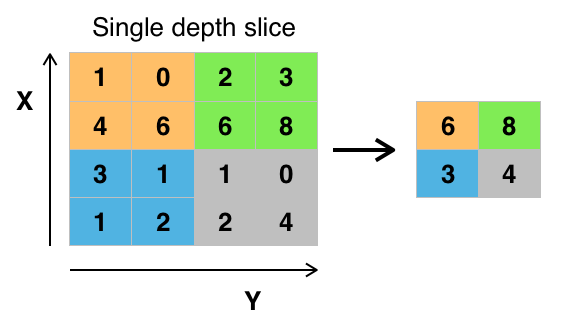

**Pooling serves two main purposes:**

- the data size gets smaller
- small variations (shifts by few pixels) get averaged out

After Max Pooling, let's say we end up with two 2x2 matrices, we can then use flatten to obtain a (8, ) matrix which can then be fed into a Dense (1) layer with let's say a Sigmoid activation and we'll obtain a probability of whether the image we fed in is a face or not!

## Architecture of a Convolutional Network

- A typical CNN for image processing starts with a large Convolutional Layer and few feature maps, followed by a Max Pooling Layer.
- Then, Convolutional and Max Pooling Layers alternate. The Convolutional Layers get smaller and smaller, while there are more and more feature maps.
- Finally, there are a few (1-3) fully connected layers.

CNNs for image processing often consist of 100+ layers. Training them not only requires a lot of time and memory, but also poses a few algorithmic challenges, for which a couple of tricks are required.



## Exercise

Build your own CNN and try to achieve the highest possible accuracy on MNIST.

- start with a working Keras model trained on MNIST
- change the input shape to (28, 28, 1)
- replace the Dense layers by 2D Convolutional layers
- add MaxPooling layers after the convolutionals
- add a Flatten layer before the final dense/softmax layer
- make sure it works
- add regularization techniques (Dropout, BatchNorm)
- experiment with the number of feature maps
- see whether peformance increases

What are the advantages of a ConvolutionalNN over a fully connected DeepNN for image classification?

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras import models, layers
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras import backend as K 
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

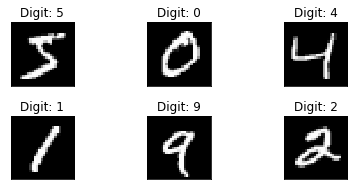

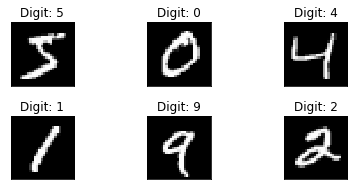

In [3]:
fig = plt.figure()
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(xtrain[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(ytrain[i]))
    plt.xticks([])
    plt.yticks([])
fig

- top left hand corner the image of 5 is stored in xtrain[0] and ytrain[0] contains the label ‘5’. 
- Our deep learning model should be able to only take the handwritten image and predict the actual digit written

Now, to prepare the data we need some processing on the images like resizing images, normalizing the pixel values etc.


In [ ]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

In [4]:
print(f'xtrain shape:{xtrain.shape}\nytrain shape:{ytrain.shape}\nxtest shape:{xtest.shape}\nytest shape:{ytest.shape}')

xtrain shape:(60000, 28, 28)
ytrain shape:(60000,)
xtest shape:(10000, 28, 28)
ytest shape:(10000,)


In [5]:
xtrain = xtrain.reshape(60000, 28, 28, 1)

In [6]:
model = Sequential([
    Convolution2D(32, (3, 3), input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
#     Dropout(0.5),
#     BatchNormalization(),
    Activation('relu'),
    
    Convolution2D(64, (3, 3)),
    MaxPooling2D(pool_size=(2,2)),
#     Dropout(0.5),
#     BatchNormalization(),
    Activation('relu'),
    
    Convolution2D(64, (3, 3)),
    MaxPooling2D(pool_size=(2,2)),
#     BatchNormalization(),
    Activation('relu'),
    
    Flatten(),
    Dense(64),
    Activation('relu'),
    Dense(10),
#     BatchNormalization(),
    Activation('softmax'),
])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
activation_2 (Activation)    (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
__________

In [8]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['categorical_crossentropy', 'accuracy'])

In [9]:
hist = model.fit(xtrain, ytrain, epochs=100, batch_size=700, verbose=1) 
hist

ValueError: Error when checking target: expected activation_5 to have shape (10,) but got array with shape (1,)

In [12]:
model.evaluate(xtest, ytest)

## Behrens' example!

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(
    32,
    (3,3),
    activation='relu',
    input_shape=(28,28,1)
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dens

In [7]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['categorical_crossentropy', 'accuracy'])

In [8]:
hist = model.fit(xtrain, ytrain, epochs=100, batch_size=700, verbose=1) 
hist

ValueError: Error when checking target: expected dense_2 to have shape (10,) but got array with shape (1,)